In [2]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

# Transfer Learning: ResNet50



In [3]:
# Load ResNet50 without pre-trained weights
base_model = ResNet50(weights=None, include_top=False, input_shape=(224, 224, 3))

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global average pooling
x = Dense(1024, activation='relu')(x)  # Fully connected layer
predictions = Dense(2, activation='softmax')(x)  # Binary classification (apple vs banana)

In [4]:
# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Print model summary
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 25,687,938 (97.99 MB)

 Trainable params: 25,634,818 (97.79 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [5]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01),
               loss='categorical_crossentropy',
                 metrics=['accuracy'])

In [6]:
# from tensorflow.keras.applications.resnet50 import preprocess_input
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# image_size = 224
# data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)


# train_generator = data_generator.flow_from_directory(
#         '/content/drive/MyDrive/fruits-360/Training',
#         target_size=(image_size, image_size),
#         batch_size=1,
#         class_mode='categorical')

# validation_generator = data_generator.flow_from_directory(
#         '/content/drive/MyDrive/fruits-360/Test',
#         target_size=(image_size, image_size),
#         batch_size=1,
#         class_mode='categorical')

In [7]:
# Prepare your data (example: using ImageDataGenerator)
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1.0/255, rotation_range=20, width_shift_range=0.2,
                                   height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1.0/255)

# Directories containing training and validation data
train_dir = '/content/drive/MyDrive/fruits-360/Training'
val_dir = '/content/drive/MyDrive/fruits-360/Test'

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(224, 224),
                                                    batch_size=32, class_mode='categorical')
val_generator = val_datagen.flow_from_directory(val_dir, target_size=(224, 224),
                                                batch_size=32, class_mode='categorical')

Found 982 images belonging to 2 classes.
Found 330 images belonging to 2 classes.


In [8]:
# Train the model
history = model.fit(train_generator,
                    validation_data = val_generator,
                    steps_per_epoch = train_generator.n//train_generator.batch_size,
                    validation_steps = val_generator.n//val_generator.batch_size,
                    epochs=50)
# Save the trained model
model.save('custom_resnet_model.h5')

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


30/30 ━━━━━━━━━━━━━━━━━━━━ 346s 9s/step - accuracy: 0.5766 - loss: 14.4139 - val_accuracy: 0.4906 - val_loss: 67047634946228224.0000
Epoch 2/50
 1/30 ━━━━━━━━━━━━━━━━━━━━ 9s 314ms/step - accuracy: 0.7812 - loss: 0.4010

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 228ms/step - accuracy: 0.7812 - loss: 0.4010 - val_accuracy: 0.7000 - val_loss: 19153430278832128.0000
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 78s 515ms/step - accuracy: 0.8657 - loss: 0.2632 - val_accuracy: 0.5031 - val_loss: 41792430080.0000
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.3000 - val_loss: 46334705664.0000
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 538ms/step - accuracy: 0.8882 - loss: 0.4412 - val_accuracy: 0.5031 - val_loss: 978544000.0000
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0111 - val_accuracy: 0.3000 - val_loss: 1132333824.0000
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 23s 575ms/step - accuracy: 0.9996 - loss: 0.0028 - val_accuracy: 0.4938 - val_loss: 1452917.3750
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.6000 - val_loss: 859445.6875
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 39s 518m

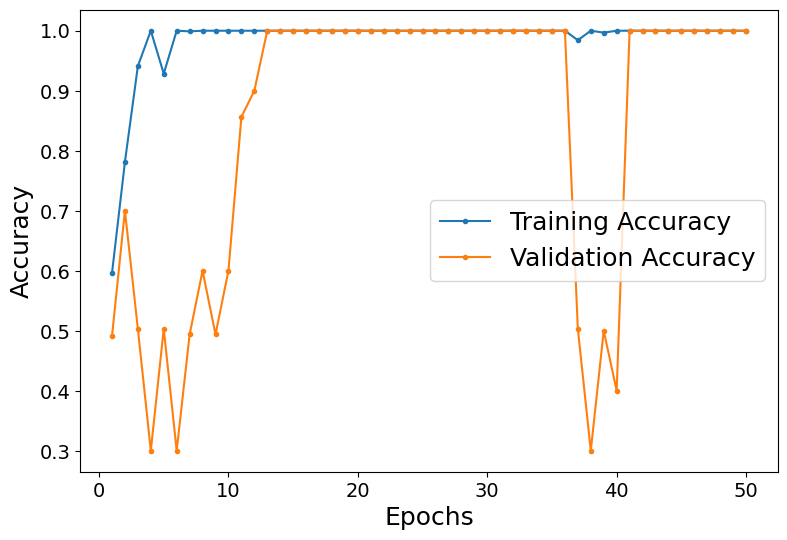

In [9]:
# Extract the loss values from the history
import matplotlib.pylab as plt

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

params = {
   'axes.labelsize': 18,
   'font.size': 18,
   'legend.fontsize': 18,
   'xtick.labelsize': 14,
   'ytick.labelsize': 14,
   'text.usetex': False,
   'figure.figsize': [9, 6]
   }
plt.rcParams.update(params)


# Create a plot to visualize the training and validation loss
#plt.figure(figsize=(5, 3))
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy', marker='.')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy', marker='.')
#plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(False)


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Predicted class: Pomegranate 1
[[0. 1.]]


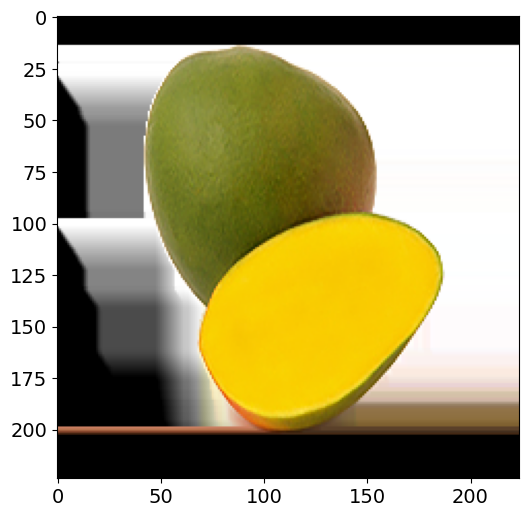

In [10]:
# Load and preprocess the image
# Replace 'path_to_your_image.jpg' with the path to your image
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = '/content/mango.jpg'
img = image.load_img(img_path, target_size=(224, 224))  # RESNET 224x224
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Make predictions
predictions = model.predict(x)
plt.imshow(img)
# Get the predicted class index
predicted_class_index = np.argmax(predictions)

# Get the class labels from the train_generator
class_labels = list(train_generator.class_indices.keys())

# Print the predicted class name
predicted_class_name = class_labels[predicted_class_index]
print("Predicted class:", predicted_class_name)
print(predictions)

# ANN Model

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

def get_regularized_model(wd, rate):
  model_2 = Sequential([
      tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
      # Dense(28, kernel_regularizer = regularizers.l1_l2(wd, wd), activation='relu', input_shape=(224, 224, 3)),
      Dropout(rate),
      Dense(14, kernel_regularizer = regularizers.l2(wd), activation='relu'),
      Dropout(rate),
      Dense(28, kernel_regularizer = regularizers.l2(wd), activation='tanh'),
      Dropout(rate),
      Dense(28, kernel_regularizer = regularizers.l2(wd), activation='tanh'),
      Dropout(rate),
      Dense(28, kernel_regularizer = regularizers.l2(wd), activation='tanh'),
      Dropout(rate),
      Dense(14, kernel_regularizer = regularizers.l2(wd), activation='relu'),
      Dropout(rate),
      Dense(2)

  ])
  return model_2

In [12]:
model_2 = get_regularized_model(1e-3, 0.2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
model_2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 150528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 150528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 14)                  │       2,107,406 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 14)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 28)                  │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 28)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 28)                  │             812 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 28)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 28)                  │             812 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 28)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 14)                  │             406 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 14)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 2)                   │              30 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,109,886 (8.05 MB)

 Trainable params: 2,109,886 (8.05 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model_2.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='mae')

In [15]:
# Train the model
history_2 = model_2.fit(train_generator,
                    validation_data = val_generator,
                    steps_per_epoch = train_generator.n//train_generator.batch_size,
                    validation_steps = val_generator.n//val_generator.batch_size,
                    epochs=50)
# Save the trained model
model_2.save('ANN_Model.h5')

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 27s 552ms/step - loss: 0.7449 - val_loss: 0.6707
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.5953 - val_loss: 0.6585
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 30s 388ms/step - loss: 0.6994 - val_loss: 0.6674
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step - loss: 0.7368 - val_loss: 0.6631
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 15s 372ms/step - loss: 0.6854 - val_loss: 0.6549
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step - loss: 0.6853 - val_loss: 0.6691
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 409ms/step - loss: 0.6605 - val_loss: 0.6483
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5974 - val_loss: 0.6133
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 15s 401ms/step - loss: 0.6594 - val_loss: 0.6408
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step - loss: 0.6073 - val_loss: 0.6213
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 21s 377ms/step - loss: 0.6418 - val_loss: 0.6304
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/st

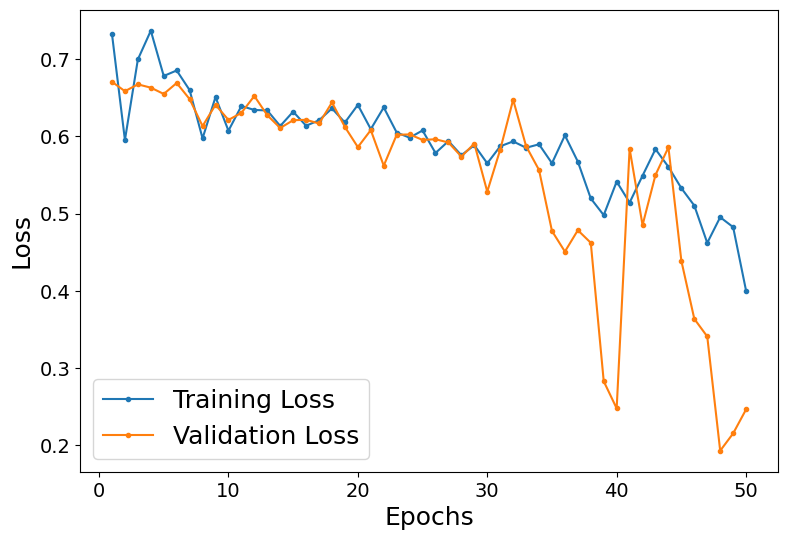

In [16]:
# Extract the loss values from the history
import matplotlib.pylab as plt

train_loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

params = {
   'axes.labelsize': 18,
   'font.size': 18,
   'legend.fontsize': 18,
   'xtick.labelsize': 14,
   'ytick.labelsize': 14,
   'text.usetex': False,
   'figure.figsize': [9, 6]
   }
plt.rcParams.update(params)


# Create a plot to visualize the training and validation loss
#plt.figure(figsize=(5, 3))
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss', marker='.')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss', marker='.')
#plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 679ms/step
Predicted class: Mango 1
[[ 0.7970513  -0.00085323]]


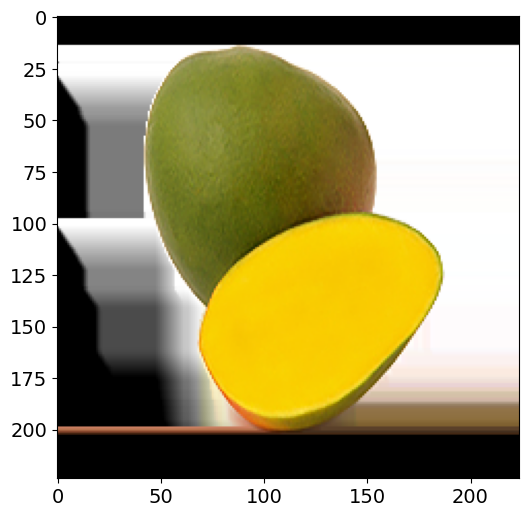

In [17]:
# Make predictions
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = '/content/mango.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

predictions = model_2.predict(x)
plt.imshow(img)
# Get the predicted class index
predicted_class_index = np.argmax(predictions)

# Get the class labels from the train_generator
class_labels = list(train_generator.class_indices.keys())

# Print the predicted class name
predicted_class_name = class_labels[predicted_class_index]
print("Predicted class:", predicted_class_name)
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted class: Pomegranate 1
[[0.03122866 0.8983699 ]]


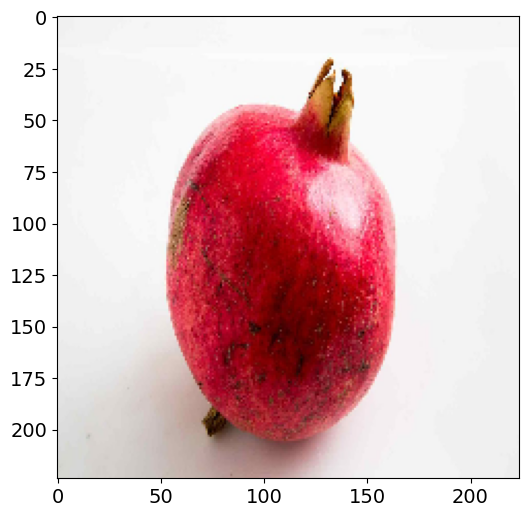

In [18]:
# Make predictions
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = '/content/pomegranate'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

predictions = model_2.predict(x)
plt.imshow(img)
# Get the predicted class index
predicted_class_index = np.argmax(predictions)

# Get the class labels from the train_generator
class_labels = list(train_generator.class_indices.keys())

# Print the predicted class name
predicted_class_name = class_labels[predicted_class_index]
print("Predicted class:", predicted_class_name)
print(predictions)

# CNN Model

In [19]:
# define the model
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization


model_3 = Sequential()
model_3.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model_3.add(MaxPooling2D((2, 2)))
model_3.add(Conv2D(64, (3, 3), activation='relu'))
model_3.add(MaxPooling2D((2, 2)))
model_3.add(Conv2D(64, (3, 3), activation='relu'))
model_3.add(MaxPooling2D((2, 2)))
model_3.add(Conv2D(64, (3, 3), activation='relu'))
model_3.add(MaxPooling2D((2, 2)))
model_3.add(Conv2D(64, (3, 3), activation='relu'))
model_3.add(Flatten())
model_3.add(Dense(32, activation='relu'))
model_3.add(Dropout(0.5))
model_3.add(Dense(16, activation='relu'))
model_3.add(Dropout(0.5))
model_3.add(Dense(2))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model_3.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 10, 10, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 32)                  │         204,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 2)                   │              34 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 335,570 (1.28 MB)

 Trainable params: 335,570 (1.28 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model_3.compile(optimizer='adam',
              loss=tf.keras.losses.MeanAbsoluteError(),
              metrics=['accuracy'])

In [22]:
history_3 = model_3.fit(train_generator,
                    validation_data = val_generator,
                    steps_per_epoch = train_generator.n//train_generator.batch_size,
                    validation_steps = val_generator.n//val_generator.batch_size,
                    epochs=50)
# Save the trained model
model_3.save('CNN_Model.h5')

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 29s 644ms/step - accuracy: 0.5632 - loss: 0.5034 - val_accuracy: 1.0000 - val_loss: 0.3822
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.7188 - loss: 0.4150 - val_accuracy: 1.0000 - val_loss: 0.4012
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 27s 430ms/step - accuracy: 0.7906 - loss: 0.4482 - val_accuracy: 1.0000 - val_loss: 0.3726
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - accuracy: 0.8125 - loss: 0.3882 - val_accuracy: 1.0000 - val_loss: 0.3873
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 16s 420ms/step - accuracy: 0.7920 - loss: 0.3953 - val_accuracy: 1.0000 - val_loss: 0.3197
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8438 - loss: 0.3783 - val_accuracy: 1.0000 - val_loss: 0.3356
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 430ms/step - accuracy: 0.8162 - loss: 0.3822 - val_accuracy: 1.0000 - val_loss: 0.3326
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 731us/step - accuracy: 0.8750 - loss: 0.3872 - val_accuracy: 1

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


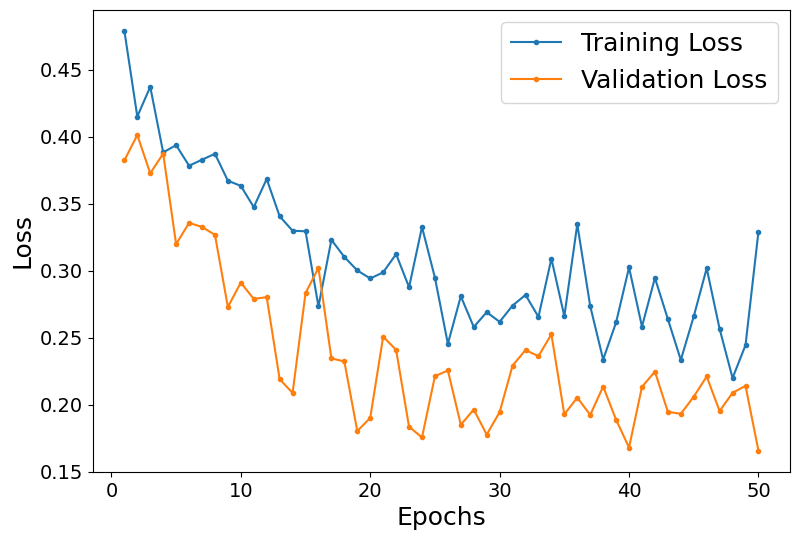

In [24]:
import matplotlib.pylab as plt

train_loss_2 = history_3.history['loss']
val_loss_2 = history_3.history['val_loss']

params = {
   'axes.labelsize': 18,
   'font.size': 18,
   'legend.fontsize': 18,
   'xtick.labelsize': 14,
   'ytick.labelsize': 14,
   'text.usetex': False,
   'figure.figsize': [9, 6]
   }
plt.rcParams.update(params)


# Create a plot to visualize the training and validation loss
#plt.figure(figsize=(5, 3))
plt.plot(range(1, len(train_loss_2) + 1), train_loss_2, label='Training Loss', marker='.')
plt.plot(range(1, len(val_loss_2) + 1), val_loss_2, label='Validation Loss', marker='.')
#plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 696ms/step
Predicted class: class_0
[[ 1.8396419  -0.26675615]]


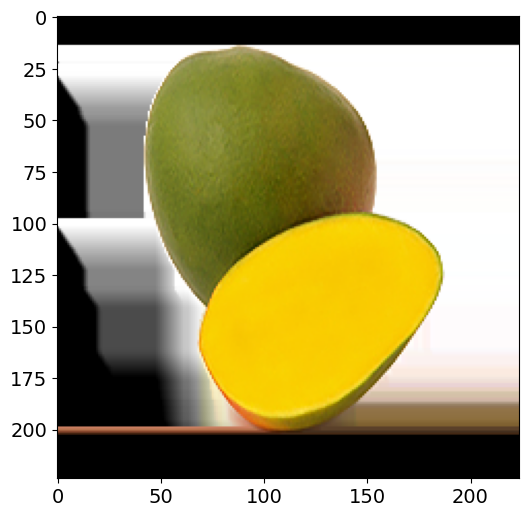

In [25]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = '/content/mango.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Make predictions
predictions = model_3.predict(x)
plt.imshow(img)
# Get the predicted class index
predicted_class_index = np.argmax(predictions)

# Assuming your model has 100 output classes, generate a list of class labels
# Replace with your actual class names if they are different
class_labels = [f'class_{i}' for i in range(100)]

# Print the predicted class name
predicted_class_name = class_labels[predicted_class_index]
print("Predicted class:", predicted_class_name)
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted class: class_1
[[-0.10863768  4.747134  ]]


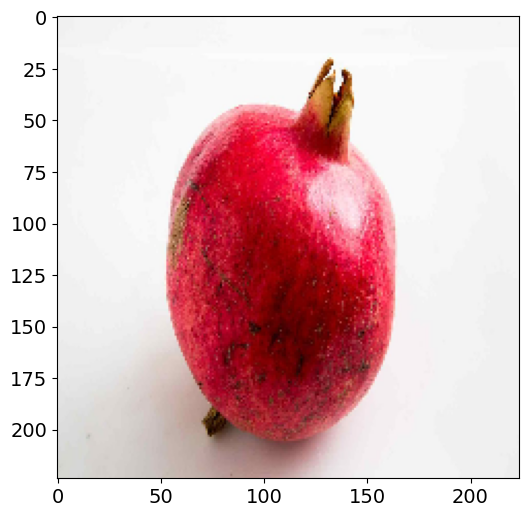

In [26]:
img_path = '/content/pomegranate'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Make predictions
predictions = model_3.predict(x)
plt.imshow(img)
# Get the predicted class index
predicted_class_index = np.argmax(predictions)

# Assuming your model has 100 output classes, generate a list of class labels
# Replace with your actual class names if they are different
class_labels = [f'class_{i}' for i in range(100)]

# Print the predicted class name
predicted_class_name = class_labels[predicted_class_index]
print("Predicted class:", predicted_class_name)
print(predictions)